### Imports

In [1]:
import pandas as pd
import numpy as np
import time
from datetime import timedelta, datetime
from sklearn.decomposition import LatentDirichletAllocation

### Reading in the data

In [2]:
data = pd.read_csv("subject_verb_df.csv", index_col=0)

In [3]:
data.head()

,olema,teadma,ütlema,tahtma,saama,tähendama,tegema,lisama,arvama,nägema,...,kiduma,klõbisema,runnima,viidsima,pritsuma,ketaalima,seiduma,ücima,müübima,juksima
tema,210031,15303,43006,22397,37392,829,33115,31796,7440,11059,...,0,0,0,0,0,0,0,0,0,0
mina,122824,48357,22122,41302,39695,131,29568,659,30362,21060,...,0,0,3,3,0,0,0,3,0,0
see,498627,2305,1064,868,7488,38195,10684,820,201,1968,...,0,0,0,0,3,0,0,0,0,0
mis,159528,607,2033,1970,17968,12900,11499,564,739,3730,...,0,0,0,0,0,0,0,0,0,0
kes,81930,8050,4846,15278,16658,34,13727,303,2673,3735,...,0,0,0,0,0,0,0,0,0,0


### Optimizing LDA

In [8]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

models = {}
perplexities = {}

for n in range(100, 1001, 100):
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    perplexity = model.perplexity(data)
    print(f"Model with {n} topics fitted and perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
    perplexities[n] = perplexity
            
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

22:35:25.102685
Model with 100 topics fitted and perplexity found at 22:37:47.763166.
Model with 200 topics fitted and perplexity found at 22:40:43.494254.
Model with 300 topics fitted and perplexity found at 22:43:58.398523.
Model with 400 topics fitted and perplexity found at 22:48:45.942719.
Model with 500 topics fitted and perplexity found at 22:54:23.206261.
Model with 600 topics fitted and perplexity found at 23:00:55.408838.
Model with 700 topics fitted and perplexity found at 23:08:02.447626.
Model with 800 topics fitted and perplexity found at 23:18:50.245668.
Model with 900 topics fitted and perplexity found at 23:30:50.589157.
23:30:50.589157
0:55:25.486471


In [11]:
perplexities

{100: 48.01630474857055,
 200: 46.66987225967397,
 300: 46.24480662749796,
 400: 46.165810812059675,
 500: 46.068828990222364,
 600: 46.21341437770039,
 700: 46.064371848637165,
 800: 46.08773037929652,
 900: 46.222410434480494,
 1000: 46.31603480485893}

In [12]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Perplexity')

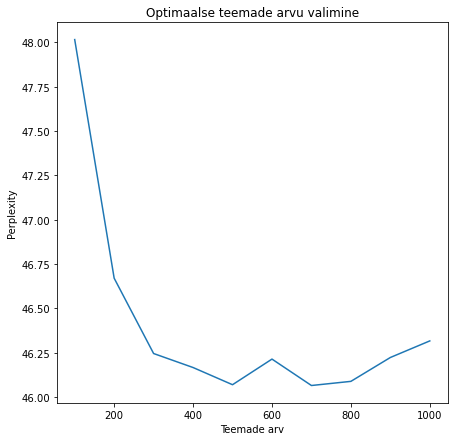

In [13]:
plt.figure(figsize=(7, 7))

plt.plot(list(range(100, 1001, 100)), perplexities.values())

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")

In [14]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

for n in [450, 550, 650, 750]:
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    perplexity = model.perplexity(data)
    print(f"Model with {n} topics fitted and perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
    perplexities[n] = perplexity
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

23:44:20.047292
Model with 450 topics fitted and perplexity found at 23:49:50.617071.
Model with 550 topics fitted and perplexity found at 23:56:35.587786.
Model with 650 topics fitted and perplexity found at 0:04:36.145541.
Model with 750 topics fitted and perplexity found at 0:15:39.396434.
0:15:39.396434
0:31:19.349143


In [15]:
perplexities

{100: 48.01630474857055,
 200: 46.66987225967397,
 300: 46.24480662749796,
 400: 46.165810812059675,
 500: 46.068828990222364,
 600: 46.21341437770039,
 700: 46.064371848637165,
 800: 46.08773037929652,
 900: 46.222410434480494,
 1000: 46.31603480485893,
 450: 46.13878668531047,
 550: 46.11593848930136,
 650: 46.1779175859795,
 750: 46.14975992662555}

Text(0, 0.5, 'Perplexity')

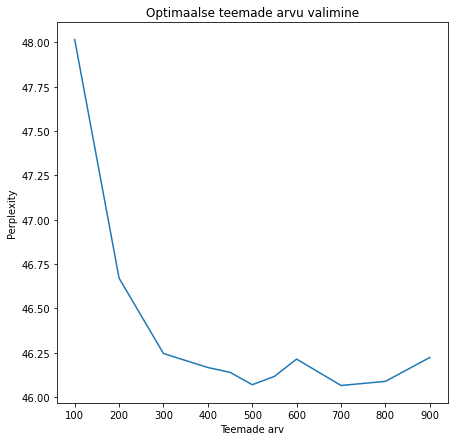

In [16]:
plt.figure(figsize=(7, 7))

keys = [100, 200, 300, 400, 450, 500, 550, 600, 700, 800, 900]

plt.plot(keys, [perplexities[key] for key in keys])

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")